ref: https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_a_real_dataset.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=linear_regression_real_tf2-colab&hl=en

In [1]:
from os.path import join # for joining file pathnames
import pandas as pd
import tensorflow as tf
import keras_core as keras
from keras_core import Sequential
import numpy as np
import matplotlib.pyplot as plt
# Import the dataset.
!python --version
!python -m pip --version
# !python -c "import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))"
print("tensorfow version:" + tf.__version__)
print(keras.__version__)

2025-04-30 16:50:39.122035: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using TensorFlow backend
Python 3.11.4
pip 25.0.1 from /Users/bangbui/anaconda3/envs/python311/lib/python3.11/site-packages/pip (python 3.11)
tensorfow version:2.16.2
0.1.7


Import the dataset.

In [2]:
training_df = pd.read_csv(filepath_or_buffer="/Users/bangbui/workspace/AlgorithmInPython/datasets/california_housing_train.csv")

In [3]:
# Print the first rows of the pandas DataFrame.
training_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


write something here.

In [4]:
# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82.4
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48.5
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58.4
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48.1


In [5]:
# Get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


Define plotting functions

In [7]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [8]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  # plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  # plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/30


/Users/bangbui/anaconda3/envs/python311/lib/python3.11/site-packages/keras_core/src/layers/core/dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 40/567 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11796877.3000 - root_mean_squared_error: 3433.3183          

I0000 00:00:1746007756.891447 1835021 service.cc:145] XLA service 0x600001f62300 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746007756.891521 1835021 service.cc:153]   StreamExecutor device (0): Host, Default Version
2025-04-30 17:09:16.892000: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-30 17:09:16.919137: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746007756.991679 1835021 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


567/567 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3730452.2126 - root_mean_squared_error: 1799.4207
Epoch 2/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 27568.3047 - root_mean_squared_error: 166.0171
Epoch 3/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 27994.6752 - root_mean_squared_error: 167.2806
Epoch 4/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 26412.2116 - root_mean_squared_error: 162.5028
Epoch 5/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25841.4001 - root_mean_squared_error: 160.6868
Epoch 6/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25493.0395 - root_mean_squared_error: 159.6461
Epoch 7/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 24909.4530 - root_mean_squared_error: 157.8030
Epoch 8/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 23946.7341 - root_mean_squared_error: 154.6536
Epoch 9/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22230.7441 - root_mean_squared_error: 149.0663
Epoch 10/30
567/567 ━━━━━━━━━━━━━━━━━━━━ 1s 1

/var/folders/8t/s_hwlxc15gq4m9yjdb6__4cm0000gn/T/ipykernel_54107/2372848049.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("\nThe learned weight for your model is %.4f" % weight)
/var/folders/8t/s_hwlxc15gq4m9yjdb6__4cm0000gn/T/ipykernel_54107/2372848049.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("The learned bias for your model is %.4f\n" % bias )


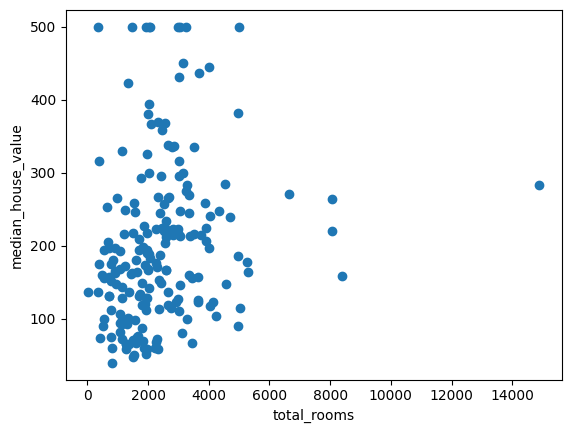

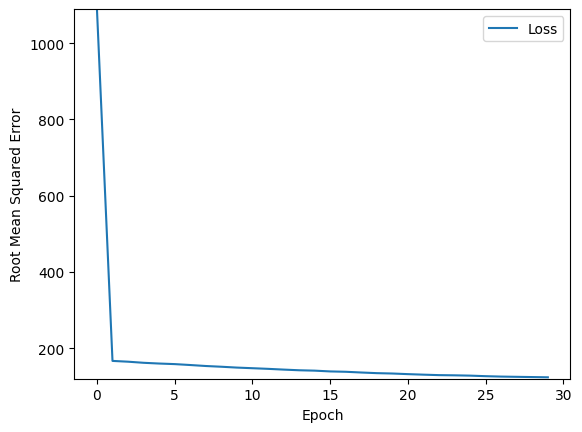

In [9]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [11]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [54]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             157
 3400     92             175
 3677     69             179
 2202     62             160
 2403     80             163
 5652    295             203
 3318    500             174
 2552    342             164
 1364    118             149
 3468    128             176
